In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Load the Dataframe
data=pd.read_csv("C:\\Users\\Rama Kumar\\Downloads\\swiggy.csv")
print(data)

            id                      name      city rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     --  Too Few Ratings   
1       531342         Janta Sweet House    Abohar    4.4      50+ ratings   
2       158203         theka coffee desi    Abohar    3.8     100+ ratings   
3       187912                 Singh Hut    Abohar    3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     --  Too Few Ratings   
...        ...                       ...       ...    ...              ...   
148536  553122          The Food Delight  Yavatmal     --  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     --  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     --  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     --  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     --  Too Few Ratings   

         cost                     cuisine          lic_no  \
0 

In [3]:
#Check the data types of all columns and their null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [4]:
#Check the parameters of numerical columns
print(data.describe())

                  id
count  148541.000000
mean   363466.378912
std    167890.977174
min       211.000000
25%    233320.000000
50%    412628.000000
75%    502223.000000
max    581031.000000


In [5]:
#Check the null values in all columns
data.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [6]:
#Drop the null values
data.dropna(inplace=True)
data.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [7]:
#Check the duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
print(data)

            id                      name      city rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     --  Too Few Ratings   
1       531342         Janta Sweet House    Abohar    4.4      50+ ratings   
2       158203         theka coffee desi    Abohar    3.8     100+ ratings   
3       187912                 Singh Hut    Abohar    3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     --  Too Few Ratings   
...        ...                       ...       ...    ...              ...   
148536  553122          The Food Delight  Yavatmal     --  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     --  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     --  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     --  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     --  Too Few Ratings   

         cost                     cuisine          lic_no  \
0 

In [9]:
#Copy the original dataframe to another before data cleaning is done
cleaned_data=data.copy(deep=True)
print(cleaned_data)



            id                      name      city rating     rating_count  \
0       567335            AB FOODS POINT    Abohar     --  Too Few Ratings   
1       531342         Janta Sweet House    Abohar    4.4      50+ ratings   
2       158203         theka coffee desi    Abohar    3.8     100+ ratings   
3       187912                 Singh Hut    Abohar    3.7      20+ ratings   
4       543530             GRILL MASTERS    Abohar     --  Too Few Ratings   
...        ...                       ...       ...    ...              ...   
148536  553122          The Food Delight  Yavatmal     --  Too Few Ratings   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     --  Too Few Ratings   
148538  559435           Cafe Bella Ciao  Yavatmal     --  Too Few Ratings   
148539  418989               GRILL ZILLA  Yavatmal     --  Too Few Ratings   
148540  447770            Lazeez kitchen  Yavatmal     --  Too Few Ratings   

         cost                     cuisine          lic_no  \
0 

In [10]:
#DATA CLEANING FOR THE COLUMNS rating,rating_count and cost

#Fom rating cloumn replace "--" to nan for purpouse of converting to Numeric
cleaned_data["rating"]= cleaned_data["rating"].replace('--','0.0')

#Fom rating_count cloumn replace 'Too Few Ratings' to '25' for purpouse of converting to Numeric
cleaned_data["rating_count"] = cleaned_data["rating_count"].replace('Too Few Ratings','5')



#After getting the extracting numnber in rating_count cloumn we have "+ rating" symbol so we can replace with ""(space)
cleaned_data["rating_count"] = cleaned_data["rating_count"].str.replace("+ ratings","")

# Replace "k" to "000" in the rating_count cloumn
cleaned_data["rating_count"] = cleaned_data["rating_count"].str.replace("K","000")

#Replace "₹" to ""(space) in the cost cloumn
cleaned_data["cost"] = cleaned_data["cost"].str.replace("₹", "")

#To convert the rating cloumn object into float
cleaned_data["rating"] =cleaned_data["rating"].astype(float)

#To convert the rating_count cloumn object into float
cleaned_data["rating_count"] = cleaned_data["rating_count"].astype(float)

#To convert the cost cloumn object into float
cleaned_data["cost"] = cleaned_data["cost"].astype(float)


In [11]:
#Print the cleaned_data dataframe
print(cleaned_data)

            id                      name      city  rating  rating_count  \
0       567335            AB FOODS POINT    Abohar     0.0           5.0   
1       531342         Janta Sweet House    Abohar     4.4          50.0   
2       158203         theka coffee desi    Abohar     3.8         100.0   
3       187912                 Singh Hut    Abohar     3.7          20.0   
4       543530             GRILL MASTERS    Abohar     0.0           5.0   
...        ...                       ...       ...     ...           ...   
148536  553122          The Food Delight  Yavatmal     0.0           5.0   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal     0.0           5.0   
148538  559435           Cafe Bella Ciao  Yavatmal     0.0           5.0   
148539  418989               GRILL ZILLA  Yavatmal     0.0           5.0   
148540  447770            Lazeez kitchen  Yavatmal     0.0           5.0   

         cost                     cuisine          lic_no  \
0       200.0            B

                                     DATA  VISUALIZATION

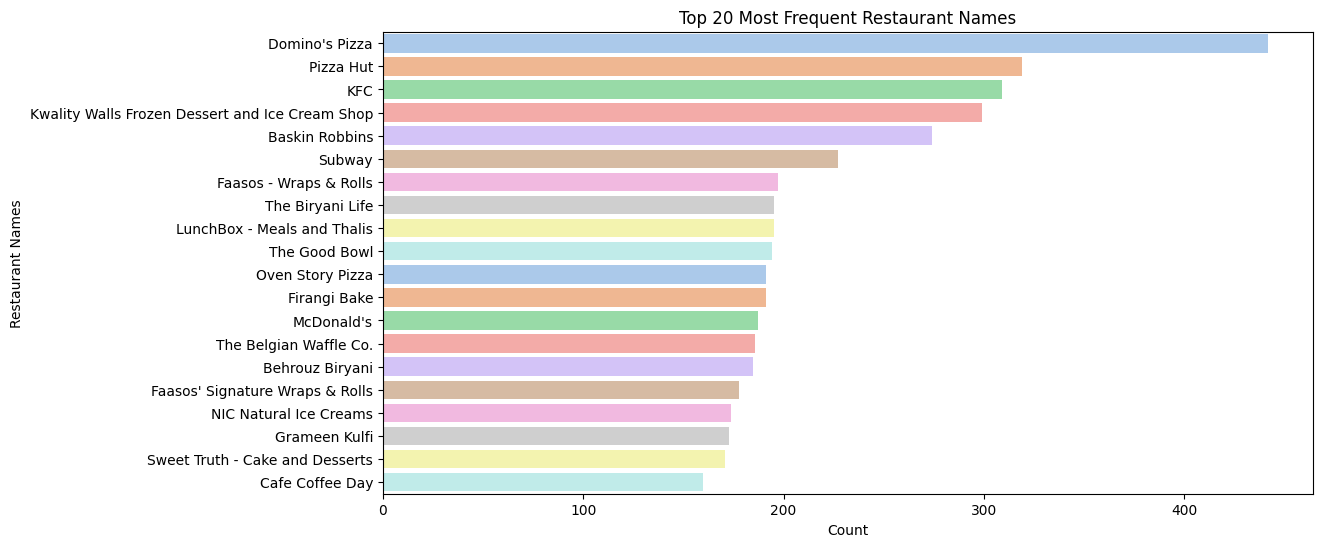

In [12]:
# Get the top 20 most frequent restaurant names...
top_20_rest_names = data['name'].value_counts().head(20)


# Plot the visulation
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_rest_names.values, y=top_20_rest_names.index,palette="pastel")

#labels and titles
plt.xlabel("Count")
plt.ylabel("Restaurant Names")
plt.title("Top 20 Most Frequent Restaurant Names")
plt.show()

Key Insights:
Domino's Pizza has the highest frequency, meaning it appears the most in the dataset followed by  fast food chains like Pizza Hut, KFC, Baskin Robbins, Subway, and McDonald's.

Ice cream brands (Kwality Walls, NIC Natural Ice Creams, Grameen Kulfi) and dessert brands (Sweet Truth, The Belgian Waffle Co.) are also common.

The dataset  includes many fast-food and dessert-focused restaurants.

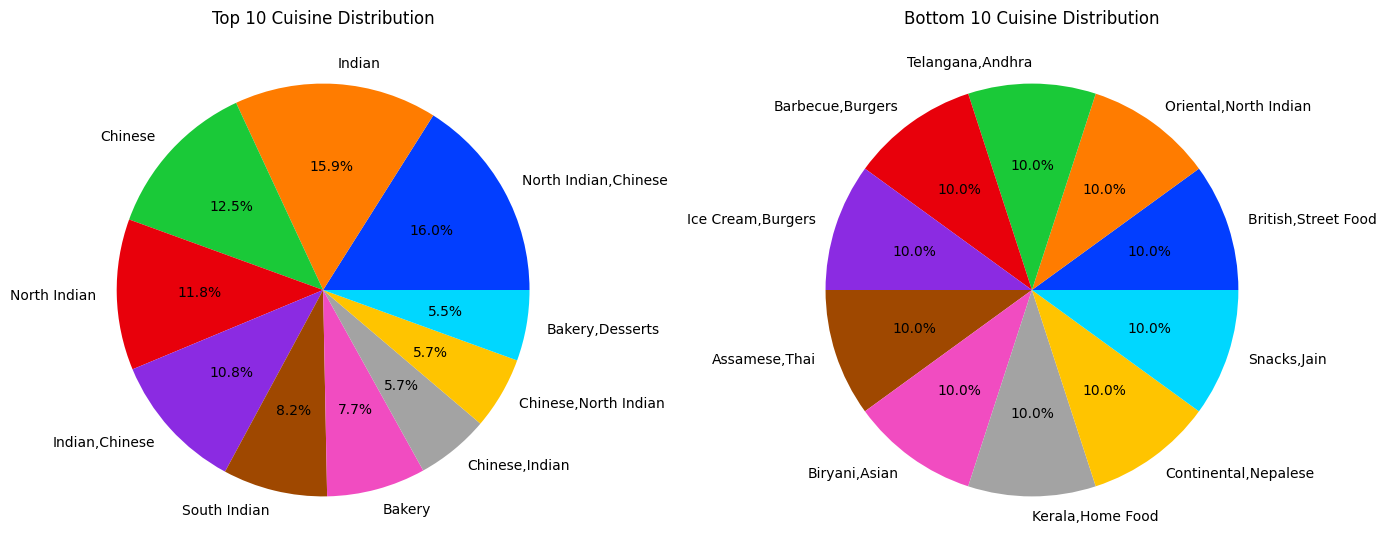

In [13]:
# Select top 10 and bottom 10 cuisines
top_cuisines = data["cuisine"].value_counts().head(10)
bottom_cuisines = data["cuisine"].value_counts().tail(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Top 10 Cuisines Pie Chart
axes[0].pie(top_cuisines, labels=top_cuisines.index, autopct="%1.1f%%", colors=sns.color_palette("bright"))
axes[0].set_title("Top 10 Cuisine Distribution")

# Bottom 10 Cuisines Pie Chart
axes[1].pie(bottom_cuisines, labels=bottom_cuisines.index, autopct="%1.1f%%", colors=sns.color_palette("bright"))
axes[1].set_title("Bottom 10 Cuisine Distribution")

plt.tight_layout()
plt.show()

Insights from the Visualization:
Top 10 Cuisine Distribution:

The most popular cuisines include Indian, Chinese, North Indian, and South Indian.

Indian cuisine is the most common cuisine, followed by Chinese and North Indian.

Bottom 10 Cuisine Distribution:



Regional and fusion cuisines such as Gujarati-Italian, Tibetan-Arabian, and Khasi appear in this category.

Less common food types like Japanese-Fast Food and Continental-Hyderabadi are also included.



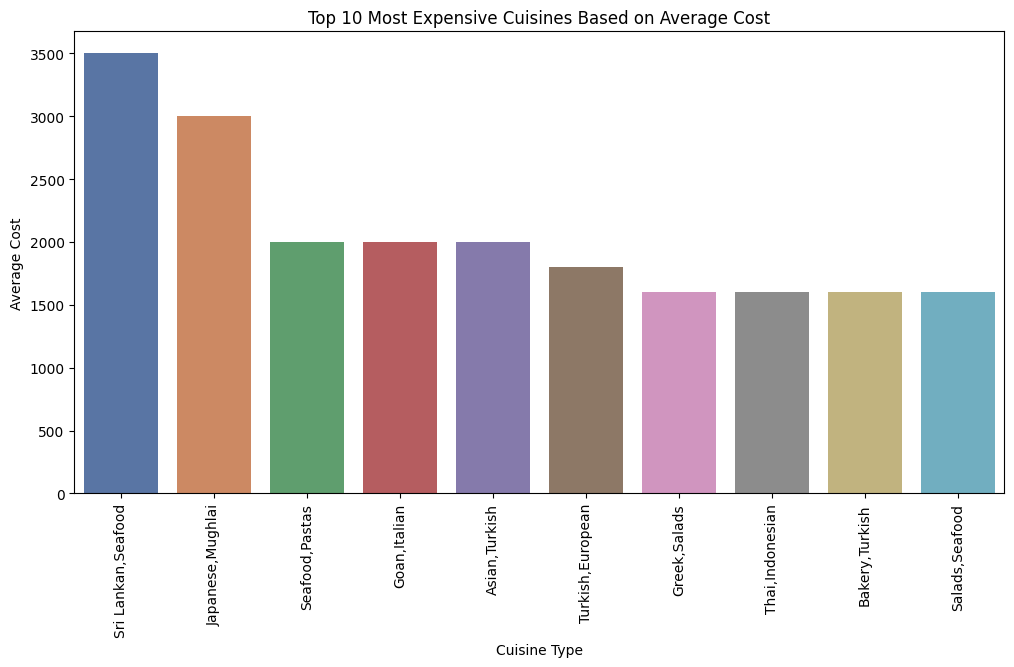

In [14]:
# Group by cuisine and calculate the average cost
top_cuisines_by_cost = cleaned_data.groupby("cuisine")["cost"].mean().sort_values(ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
#sns.barplot(x=top_cuisines_by_cost.index, y=top_cuisines_by_cost.values, palette="viridis")
sns.barplot(x=top_cuisines_by_cost.index, y=top_cuisines_by_cost.values, palette=sns.color_palette("deep"))
#labels and titles
plt.xticks(rotation=90)
plt.xlabel("Cuisine Type")
plt.ylabel("Average Cost")
plt.title("Top 10 Most Expensive Cuisines Based on Average Cost")
plt.show()

Insights from the Visualization:
Top Expensive Cuisines – The cuisines with the highest average cost are shown, making it easier to understand which ones are premium.

Sri Lankan & Japanese-Mughlai – These two cuisines have the highest average cost, indicating they might include expensive imported ingredients or fine dining experiences.
This is followed by European, Seafood & Turkish Influence 

In [15]:
#Save the cleaned_data to a csv file
cleaned_data.to_csv("cleaned_data.csv")

In [16]:
cleaned_data.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

In [17]:
#To Read the csv file and drop cloumns like lic_no, link, address and menu
data_cleaned =pd.read_csv("cleaned_data.csv").drop(columns=['lic_no', 'link', 'address', 'menu'])

In [18]:
data_cleaned

,Unnamed: 0,id,name,city,rating,rating_count,cost,cuisine
0,0,567335,AB FOODS POINT,Abohar,0.0,5.0,200.0,"Beverages,Pizzas"
1,1,531342,Janta Sweet House,Abohar,4.4,50.0,200.0,"Sweets,Bakery"
2,2,158203,theka coffee desi,Abohar,3.8,100.0,100.0,Beverages
3,3,187912,Singh Hut,Abohar,3.7,20.0,250.0,"Fast Food,Indian"
4,4,543530,GRILL MASTERS,Abohar,0.0,5.0,250.0,"Italian-American,Fast Food"
...,...,...,...,...,...,...,...,...
148250,148536,553122,The Food Delight,Yavatmal,0.0,5.0,200.0,"Fast Food,Snacks"
148251,148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,0.0,5.0,300.0,Pizzas
148252,148538,559435,Cafe Bella Ciao,Yavatmal,0.0,5.0,300.0,"Fast Food,Snacks"
148253,148539,418989,GRILL ZILLA,Yavatmal,0.0,5.0,250.0,Continental


In [19]:
data_cleaned['city']=data_cleaned['city'].str.split(',').str[-1].str.strip()

In [20]:
data_cleaned['city']

0           Abohar
1           Abohar
2           Abohar
3           Abohar
4           Abohar
            ...   
148250    Yavatmal
148251    Yavatmal
148252    Yavatmal
148253    Yavatmal
148254    Yavatmal
Name: city, Length: 148255, dtype: object

In [21]:
data_cleaned['cuisine']

0                   Beverages,Pizzas
1                      Sweets,Bakery
2                          Beverages
3                   Fast Food,Indian
4         Italian-American,Fast Food
                     ...            
148250              Fast Food,Snacks
148251                        Pizzas
148252              Fast Food,Snacks
148253                   Continental
148254                        Pizzas
Name: cuisine, Length: 148255, dtype: object

In [22]:
# Split the 'cuisine' string into a list and strip spaces from each item
data_cleaned['cuisine'] = data_cleaned['cuisine'].str.split(',').apply(lambda x:[i.strip() for i in x])


In [23]:
#Display the cuisine column
data_cleaned['cuisine']

0                   [Beverages, Pizzas]
1                      [Sweets, Bakery]
2                           [Beverages]
3                   [Fast Food, Indian]
4         [Italian-American, Fast Food]
                      ...              
148250              [Fast Food, Snacks]
148251                         [Pizzas]
148252              [Fast Food, Snacks]
148253                    [Continental]
148254                         [Pizzas]
Name: cuisine, Length: 148255, dtype: object

In [24]:
#Display the count of various cuisines 
data_cleaned['cuisine'].value_counts()

cuisine
[North Indian, Chinese]     6463
[Indian]                    6399
[Chinese]                   5045
[North Indian]              4764
[Indian, Chinese]           4368
                            ... 
[Vietnamese, Korean]           1
[Middle Eastern, Indian]       1
[Maharashtrian, Tandoor]       1
[Oriya, Sweets]                1
[Continental, Jain]            1
Name: count, Length: 2130, dtype: int64

In [25]:
# Initialize the MultiLabelBinarizer to convert list-type cuisines into  encoded format
mlb = MultiLabelBinarizer()

# Transform the 'cuisine' column into multiple binary columns 
cuisine_encoded = pd.DataFrame(mlb.fit_transform(data_cleaned['cuisine']), columns=mlb.classes_)




In [26]:
#Print the encoded cuisine columns
print(cuisine_encoded.columns)
print("The length of this list is",len(cuisine_encoded.columns))


Index(['8:15 To 11:30 Pm', 'Afghani', 'African', 'American', 'Andhra',
       'Arabian', 'Asian', 'Assamese', 'Attractive Combos Available',
       'Australian',
       ...
       'Thai', 'Thalis', 'Tibetan', 'Tribal', 'Turkish',
       'Use Code JUMBO30 to avail', 'Use code XPRESS121 to avail.',
       'Vietnamese', 'Waffle', 'indian'],
      dtype='object', length=126)
The length of this list is 126


In [27]:
#Check the shape of cuisine_encoded
cuisine_encoded.shape

(148255, 126)

In [28]:
# Numerical columns
numerical_cols = data_cleaned[['rating', 'rating_count', 'cost']]

# intiliaze the one_hot encoder 
city_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

#Apply one hot encoder to city column and get features
city_encoded = pd.DataFrame(city_encoder.fit_transform(data_cleaned[['city']]), 
                            columns=city_encoder.get_feature_names_out(['city']))
# Combine all
final_encoded = pd.concat([numerical_cols, city_encoded, cuisine_encoded], axis=1)

In [29]:
# Save MultiLabelBinarizer for cuisine
with open("cuisine_encoder.pkl", "wb") as f:
    pickle.dump(mlb, f)

# Save OneHotEncoder for city
with open("city_encoder.pkl", "wb") as f:
    pickle.dump(city_encoder, f)

In [30]:
# Save column names to a CSV file
pd.Series(city_encoded.columns).to_csv("city_columns.csv", index=False, header=["city_column"])

# Save column names to a CSV file
pd.Series(cuisine_encoded.columns).to_csv("cuisine_columns.csv", index=False, header=["cuisine_column"])

In [31]:
# To check the shape of dataset
final_encoded.shape

(148255, 681)

In [32]:
#To check the index for both csv
print(data_cleaned.index.equals(final_encoded.index))

True


In [33]:
#To convert into csv file
data_cleaned.to_csv("data_cleaned.csv", index=False)

#To convert into Encoded csv file
final_encoded.to_csv("encoded_data.csv", index=False)

In [34]:
# --- Scale data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_encoded)


# --- Apply PCA ---
pca= PCA(n_components=30)  
pca_data = pca.fit_transform(scaled_data)

# --- Train KMeans ---
kmeans = KMeans(n_clusters=10, random_state=42,n_init=10)  # you can tune n_clusters
kmeans.fit(pca_data)

# --- Save PCA-transformed data ---
pd.DataFrame(pca_data).to_csv("pca_encoded_data.csv", index=False)

# --- Save PCA model ---
with open("pca_model.pkl", "wb") as f:
    pickle.dump(pca, f)

# --- Save models ---
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ KMeans and Scaler saved successfully!")

✅ KMeans and Scaler saved successfully!


In [35]:
# ✅ Save input column order for matching later
with open("pca_input_columns.pkl", "wb") as f:
    
    pickle.dump(final_encoded.columns, f)

In [36]:
final_encoded.columns

Index(['rating', 'rating_count', 'cost', 'city_Abohar', 'city_Adilabad',
       'city_Adityapur', 'city_Adoni', 'city_Agartala', 'city_Agra',
       'city_Ahmedabad',
       ...
       'Thai', 'Thalis', 'Tibetan', 'Tribal', 'Turkish',
       'Use Code JUMBO30 to avail', 'Use code XPRESS121 to avail.',
       'Vietnamese', 'Waffle', 'indian'],
      dtype='object', length=681)